This notebook performs SASPT analysis on cells picked using version 6 of the MATLAB cellpicker, using analysis package autosmt_utils.py

In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import autosmt_utils as au

In [2]:
# read in configuration file in the new format
config = au.read_config('analysis_settings.toml')

In [3]:
# sort trajectories after PAPA and DR pulses
au.sort_PAPA_DR(config)

In [4]:
# get locs per frame for each movie
locs_df = au.getLocsByFrameDF(config,isPAPA=True)

cond1 


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


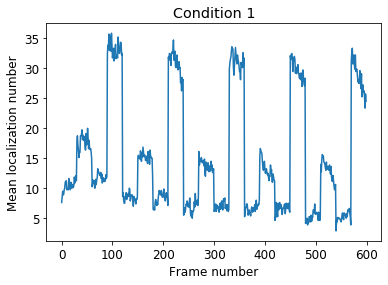

In [5]:
# Plot average number of localizations vs. frame index
au.plot_Nlocs_wholemovie(config,locs_df)

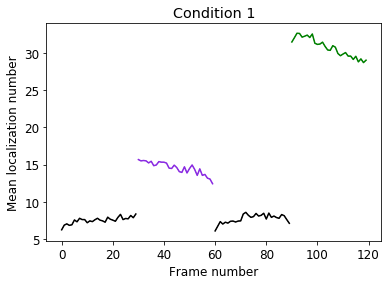

In [6]:
au.plot_Nlocs_bycycle_colors(config,locs_df,byexperiment=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Inferring posterior probability by condition.


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


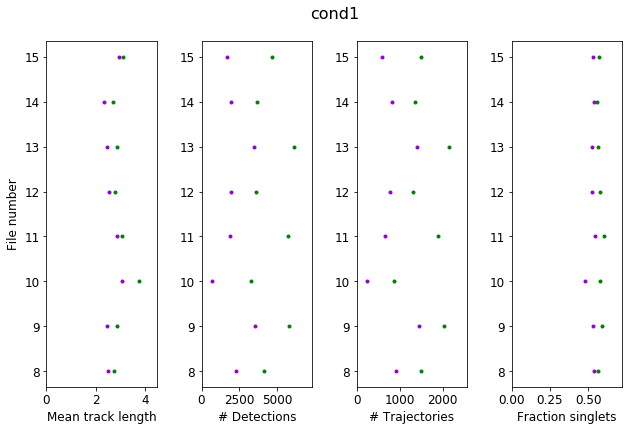

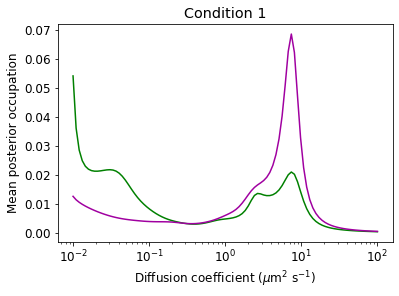

In [7]:
# Do state array analysis of each condition
[SA,posterior_occs,condition_names] = au.analyze_PAPA_DR_stateArray(config,nworkers=6)

In [28]:
D = SA.likelihood.diff_coefs
with open('figures/fbound.txt','w') as fh:
    print('Fraction bound (D < 0.1)')
    for j,c in enumerate(condition_names):
        outstring = f'{c}\t{posterior_occs[j,D <=.1].sum():.4f}'
        print(outstring)
        fh.write(outstring + '\n')

Fraction bound (D < 0.1)
cond1_DR	0.1647
cond1_PAPA	0.5270
cond1_other	0.2695


Number of trajectories in condition cond1
PAPA trajectories: 5362
DR trajectories: 3206
Subsampling 3206 trajectories each for PAPA and DR.

Inferring posterior probability by condition.


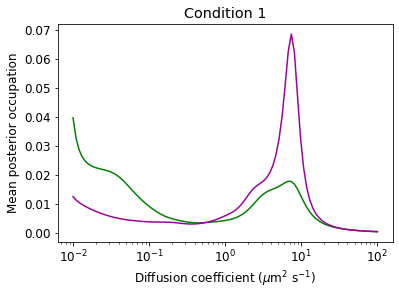

In [8]:
# Do state array analysis of each condition, subsampling the same number of trajectories for each
[SA_sameN,posterior_occs_sameN,condition_names_sameN] = au.analyze_PAPA_DR_stateArray_sameN(config,nworkers=6,randseed=1234,ignoreOther=True)

In [29]:
D = SA_sameN.likelihood.diff_coefs
with open('figures_sameN/fbound.txt','w') as fh:
    print('Fraction bound (D < 0.1)')
    for j,c in enumerate(condition_names_sameN):
        outstring = f'{c}\t{posterior_occs_sameN[j,D <=.1].sum():.4f}'
        print(outstring)
        fh.write(outstring + '\n')

Fraction bound (D < 0.1)
cond1_DR	0.1647
cond1_PAPA	0.5164
